In [65]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
# load dataset
ulam_df = pd.read_csv('./data_collection/ulam.csv', sep=',', index_col=0)
print('ulam_df.shape: {}'.format(ulam_df.shape))

ulam_df.shape: (91, 6)


In [67]:
# check dataframe info
ulam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ulam_titles            91 non-null     object
 1   ingredients            91 non-null     object
 2   ulam_descriptions      91 non-null     object
 3   ulam_instructions      91 non-null     object
 4   ulam_credits           91 non-null     object
 5   ulam_instruction_link  91 non-null     object
dtypes: object(6)
memory usage: 5.0+ KB


In [68]:
# check few random sample
ulam_df.sample(10)

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link
74,Bulalô,"['BEEF', 'BONE MARROW', 'FISH SAUCE', 'ONION',...",Bulalô is a traditional Filipino soup that is ...,"1. In a large pot over medium heat, bring enou...",Lalaine Manalo,https://www.kawalingpinoy.com/bulalo/
86,Lumpia,['LUMPIANG SHANGHAI'],Lumpia is a simple and flavourful Filipino fin...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/
77,Pancit canton,"['NOODLES', 'OR\nPORK', 'OR\nBEEF', 'SEAFOOD',...",Pancit canton is a Filipino dish of Chinese or...,"1. In a wok or wide pan over high heat, heat a...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-canton/
13,Banana Cue,"['BANANAS', 'SUGAR']",One of the most popular sweet snacks in the Ph...,1. Heat a cooking pot then pour-in cooking oil...,Vanjo Merano,https://panlasangpinoy.com/bananacue/
26,Tortang talong,"['EGGPLANT', 'EGGS']",Tortang talong is a simple Filipino dish made ...,"1. With a knife or fork, prick eggplant. Arran...",Lalaine Manalo,https://www.kawalingpinoy.com/tortang-talong/
89,Lechon,"['PORK', 'ONION', 'GARLIC', 'LEMONGRASS', 'BAY...","Lechon, derived from a Spanish word for roaste...","1. Place garlic, cilantro, oregano, salt, pepp...",Robby Melvin,https://www.myrecipes.com/recipe/lechon
7,Lauya,"['OR\nCHICKEN', 'OR\nPORK', 'BEEF', 'CABBAGE',...",Lauya is a comforting Filipino dish which may ...,1. Chop the pork knuckles or let the meat vend...,Manny,https://www.panlasangpinoymeatrecipes.com/lauy...
19,Ube halaya,"['YAM', 'OR\nCONDENSED MILK', 'OR\nMILK', 'COC...",Ube halaya is a famous Filipino dessert made w...,"1. In a wide, heavy-bottomed pan over medium h...",Lalaine Manalo,https://www.kawalingpinoy.com/halayang-ube/
72,Tocino,"['PORK', 'SUGAR', 'SALT', 'RICE WINE', 'SOY SA...","Although the term tocino stems from Spanish, i...","1. In a bowl, combine pork, sugar, salt, garli...",Lalaine Manalo,https://www.kawalingpinoy.com/pork-tocino/
44,Gulaman,"['GELATIN', 'VANILLA', 'CONDENSED MILK']",Gulaman is the Filipino term for agar-agar or ...,1.\tCook the tapioca according to package inst...,Vanjo Merano,https://panlasangpinoy.com/sago-at-gulaman/


In [69]:
# compute basic ulam_titles descriptive stats

ulam_df['ulam_titles'].describe()

count                91
unique               91
top       Adobong manok
freq                  1
Name: ulam_titles, dtype: object

In [70]:
# remove the "OR\n" to some ingredients and convert the ingredients 
# list to a single string where each ingredient are separated by the symbol '|'

def remove_or_slash_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    ingredients_cleaned = [ingredient.split(r'OR\n')[-1].lower().strip() for ingredient in list(ingredients)]
    return '|'.join(ingredients_cleaned)

ulam_df['ingredients'] = ulam_df['ingredients'].apply(remove_or_slash_n)

In [71]:
# check few random sample
ulam_df.sample(10)

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link
35,Utan,eggplant|okra|ginger|tomato|scallions|spinach|...,Easy to prepare and packed with healthy vegeta...,1. Bring the water to a boil.\r\n2. Add the gi...,Vanjo Merano,https://panlasangpinoy.com/utan-bisaya/
19,Ube halaya,yam|condensed milk|milk|coconut milk|sugar|van...,Ube halaya is a famous Filipino dessert made w...,"1. In a wide, heavy-bottomed pan over medium h...",Lalaine Manalo,https://www.kawalingpinoy.com/halayang-ube/
18,Adobong pusit,squid|vinegar|soy sauce|onion|tomato|garlic|sa...,Adobong pusit is a traditional Filipino dish t...,1. Heat a wok or cooking pot them pour-in soy ...,Vanjo Merano,https://panlasangpinoy.com/adobong-pusit-recipe/
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...,Pancit is a staple Filipino dish found at nume...,"1. In a sauce pot over medium heat, cook insta...",Lalaine Manalo,https://www.kawalingpinoy.com/mock-pancit-cant...
52,Kwek kwek,cornstarch|quail egg|annatto powder,"Deep-fried kwek kwek is a type of tokneneng, t...",1. Place the cornstarch in a container and dre...,Vanjo Merano,https://panlasangpinoy.com/pinoy-street-food-o...
88,Sisig,pork|offal|vinegar|onion|hot peppers|soy sauce...,Sisig is a popular Filipino dish made by boili...,1. Pour the water in a pan and bring to a boil...,Vanjo Merano,https://panlasangpinoy.com/pork-sisig/
53,Atchara,papaya|carrot|onion|daikon radish|bell pepper|...,Atchara is the famous Filipino green papaya pi...,1. Clean the papaya and carrots under running ...,Huy Vu,https://www.hungryhuy.com/atchara-pickled-papaya/
12,Pinikpikan,chicken|pork|cabbage|green beans|salt,Pinikpikan is a controversial dish originating...,"1.\tPrepare a hooded charcoal grill, light up ...",Raymund,https://www.angsarap.net/2022/03/22/pinikpikan...
55,Arroz caldo,chicken|rice|ginger|fish sauce|onion|garlic|sa...,"Arroz caldo is the Filipino variety of congee,...","1. Trim chicken of unwanted fat, rinse and dra...",Lalaine Manalo,https://www.kawalingpinoy.com/arroz-caldo/
28,Kutsinta,rice flour|sugar|lye water|annatto powder,Kutsinta is a sweet Filipino delicacy made wit...,"\r\n1. In a bowl, combine flour, tapioca flour...",Lalaine Manalo,https://www.kawalingpinoy.com/kutsinta/


In [72]:
# compute total ingredients per dish (ulam)

ulam_df['num_ingredients'] = ulam_df['ingredients'].apply(lambda ing: len(ing.split('|')))
ulam_df.sort_values(by='num_ingredients', ascending=False)

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
82,Sinigang,tamarind|guava|pork|seafood|chicken|beef|fish ...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,20
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,Pochero is a beloved Filipino stew that was cr...,"1. In a deep pot over medium heat, heat about ...",Lalaine Manalo,https://www.kawalingpinoy.com/pork-pochero/,15
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...,Kare-kare is a traditional Filipino stew consi...,"1. Rinse oxtail under cold, running water and ...",Lalaine Manalo,https://www.kawalingpinoy.com/kare-kare/,14
58,Pinakbet,pork|shrimp paste|pumpkin|sweet potato|eggplan...,Pinakbet is a traditional Filipino meat stew p...,"1. In pot over medium heat, heat oil. Add onio...",Lalaine Manalo,https://www.kawalingpinoy.com/pinakbet/,13
49,Batchoy,noodles|stock|pork|bone marrow|offal|eggs|chic...,The hearty batchoy is a popular Filipino soup ...,"1. In a sauce pot, combine pork blood and enou...",Lalaine Manalo,https://www.kawalingpinoy.com/batchoy-tagalog/,13
...,...,...,...,...,...,...,...
13,Banana Cue,bananas|sugar,One of the most popular sweet snacks in the Ph...,1. Heat a cooking pot then pour-in cooking oil...,Vanjo Merano,https://panlasangpinoy.com/bananacue/,2
46,Proben,offal|cornstarch,Proben (occasionally referred to as proven) is...,"1.\tFirst, put all your chicken proben into bo...",CEBUbulletin.ph,https://cebubulletin.ph/chicken-proben-beloved...,2
5,Bukayo,coconut|sugar,The sweet bukayo is a traditional Filipino del...,"1. In a large saucepan, combine Muscovado suga...",Ed Joven,https://www.pinoyrecipe.net/bukayo-recipe/,2
26,Tortang talong,eggplant|eggs,Tortang talong is a simple Filipino dish made ...,"1. With a knife or fork, prick eggplant. Arran...",Lalaine Manalo,https://www.kawalingpinoy.com/tortang-talong/,2


Text(0.5, 0, 'num_ingredients')

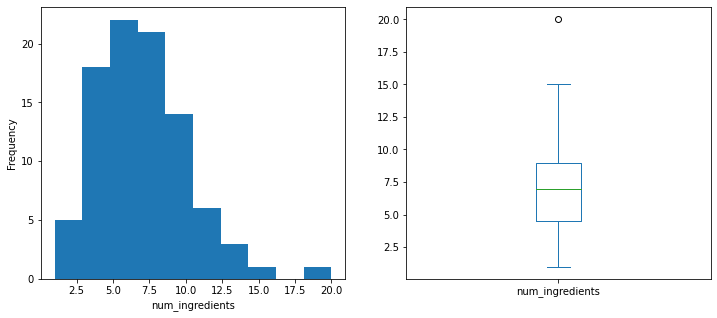

In [73]:
# view distribution of num_ingredients
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ulam_df['num_ingredients'].plot(kind='hist', ax=axes[0])
ulam_df['num_ingredients'].plot(kind='box', ax=axes[1], xlabel='')
axes[0].set_xlabel('num_ingredients')

In [74]:
# compute basic descriptive stats for number of ingredients
ulam_df['num_ingredients'].describe()

count    91.000000
mean      6.846154
std       3.272522
min       1.000000
25%       4.500000
50%       7.000000
75%       9.000000
max      20.000000
Name: num_ingredients, dtype: float64

In [75]:
# check dish with only 1 ingredient
ulam_df[ulam_df.num_ingredients == 1]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
86,Lumpia,lumpiang shanghai,Lumpia is a simple and flavourful Filipino fin...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/,1


In [76]:
# check Lumpia records
filt = ulam_df.ulam_titles.apply(lambda x: "lumpia" in x.lower())
ulam_df[filt]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
30,Lumpiang Shanghai,pork|beef|carrot|onion|salt|black pepper|sweet...,Lumpiang Shanghai is the most popular variety ...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/,7
86,Lumpia,lumpiang shanghai,Lumpia is a simple and flavourful Filipino fin...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/,1


In [77]:
# remove lumpia record as its ingredients is a lumpia variant

ulam_df.drop([86], inplace=True)

In [78]:
# represent ingredients data as bag-of-words

from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names_out()

Vocabulary size: 132


array(['annatto powder', 'baking powder', 'banana ketchup', 'bananas',
       'bangus', 'bay leaf', 'beef', 'bell pepper', 'bitter melon',
       'black pepper', 'bok choy', 'bone marrow', 'broccoli',
       'brown sugar', 'butter', 'cabbage', 'capers', 'carrot', 'cashews',
       'cassava', 'cayenne pepper', 'cheese', 'chicharrón', 'chicken',
       'chickpeas', 'citrus fruit', 'cocoa beans', 'coconut',
       'coconut cream', 'coconut milk', 'condensed milk', 'coriander',
       'corn', 'cornstarch', 'cream', 'cream of tartar', 'cumin',
       'daikon radish', 'durian', 'eggplant', 'eggs', 'fish sauce',
       'flour', 'garlic', 'gelatin', 'ginger', 'goat', 'green beans',
       'guava', 'hot dog', 'hot peppers', 'ice cream', 'ketchup', 'latik',
       'leche flan', 'leek', 'lemon', 'lemongrass', 'lime', 'long beans',
       'lye water', 'milk', 'mung bean', 'noodles', 'offal', 'oil',
       'okra', 'olive oil', 'olives', 'onion', 'orange juice', 'oxtail',
       'pancit batil patong

In [79]:
# look for ulam (dish) that has pancit in its ingredients or in its ulam title
def look_for_pancit(ulam):
    return 'pancit' in ulam.ulam_titles.lower() or 'pancit' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_pancit, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
36,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,Pancit lomi is a hearty Filipino soup consisti...,"1.\tIn a pot, bring enough water to cover nood...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-lomi/,7
38,Pancit malabon,noodles|pork|shrimps|fish sauce|cabbage|chicha...,Pancit Malabon belongs to a broad group of tra...,"1.\tIn a bowl, soak noodles in water until sof...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-malabon/,9
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot,Pancit bihon is a famous Filipino stir-fry con...,"1.\tIn a large pot, Saute the garlic and onion...",Vanjo Merano,https://panlasangpinoy.com/pancit-guisado/,6
54,Pancit palabok,noodles|shrimps|fish sauce|eggs|chicharrón|sca...,Pancit palabok is a traditional Filipino dish ...,"1. In a large bowl, soak rice noodles in water...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-palabok/,8
77,Pancit canton,noodles|pork|beef|seafood|soy sauce|carrot|oni...,Pancit canton is a Filipino dish of Chinese or...,"1. In a wok or wide pan over high heat, heat a...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-canton/,9
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...,Pancit is a staple Filipino dish found at nume...,"1. In a sauce pot over medium heat, cook insta...",Lalaine Manalo,https://www.kawalingpinoy.com/mock-pancit-cant...,8


In [80]:
# drop Pancit record as its ingredients are Pancit variants
ulam_df.drop([90], inplace=True)

In [81]:
# represent ingredients data as bag-of-words

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names_out()

Vocabulary size: 124


array(['annatto powder', 'baking powder', 'banana ketchup', 'bananas',
       'bangus', 'bay leaf', 'beef', 'bell pepper', 'bitter melon',
       'black pepper', 'bok choy', 'bone marrow', 'broccoli',
       'brown sugar', 'butter', 'cabbage', 'capers', 'carrot', 'cashews',
       'cassava', 'cayenne pepper', 'cheese', 'chicharrón', 'chicken',
       'chickpeas', 'citrus fruit', 'cocoa beans', 'coconut',
       'coconut cream', 'coconut milk', 'condensed milk', 'coriander',
       'corn', 'cornstarch', 'cream', 'cream of tartar', 'cumin',
       'daikon radish', 'durian', 'eggplant', 'eggs', 'fish sauce',
       'flour', 'garlic', 'gelatin', 'ginger', 'goat', 'green beans',
       'guava', 'hot dog', 'hot peppers', 'ice cream', 'ketchup', 'latik',
       'leche flan', 'leek', 'lemon', 'lemongrass', 'lime', 'long beans',
       'lye water', 'milk', 'mung bean', 'noodles', 'offal', 'oil',
       'okra', 'olive oil', 'olives', 'onion', 'orange juice', 'oxtail',
       'papaya', 'peanut bu

In [82]:
# look for ulam titles that has 'tapa (philippines)' as one of its ingredients
mask = ulam_df['ingredients'].apply(lambda ings: 'tapa (philippines)' in ings.split('|'))
ulam_df[mask]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
56,Tapsilog,tapa (philippines)|eggs|rice|garlic,One of the most common breakfast staples in th...,"1. In a non-reactive bowl, combine soy sauce, ...",Lalaine Manalo,https://www.kawalingpinoy.com/filipino-beef-tapa/,4
80,Silog,rice|eggs|garlic|tapa (philippines)|hot dog|to...,Silog refers to a group of Filipino dishes tha...,1. Pour water in a small cooking pot. Let boil...,Vanjo Merano,https://panlasangpinoy.com/hotsilog-hotdog-sin...,9


In [83]:
# drop Tapsilog record, leaving Silog as the general ulam with silog related ingredients 
ulam_df.drop([56], inplace=True)

In [84]:
# look for ulam (dish) that has 'leche flan' in its ingredients or in its ulam title
def look_for_leche_flan(ulam):
    return 'leche flan' in ulam.ulam_titles.lower() or 'leche flan' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_leche_flan, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
76,Halo-Halo,ice cream|leche flan|milk|bananas|durian|mung ...,The refreshing halo-halo (lit. mix-mix) is a s...,1. Prepare the gulaman according to package di...,Lalaine Manalo,https://www.kawalingpinoy.com/halo-halo/,10
79,Leche Flan,eggs|milk|condensed milk|sugar|vanilla,Leche flan is a Filipino dessert that is essen...,1. Place 3 tablespoons of sugar in each of the...,Lalaine Manalo,https://www.kawalingpinoy.com/leche-flan/,5


In [85]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names_out()

Vocabulary size: 124


array(['annatto powder', 'baking powder', 'banana ketchup', 'bananas',
       'bangus', 'bay leaf', 'beef', 'bell pepper', 'bitter melon',
       'black pepper', 'bok choy', 'bone marrow', 'broccoli',
       'brown sugar', 'butter', 'cabbage', 'capers', 'carrot', 'cashews',
       'cassava', 'cayenne pepper', 'cheese', 'chicharrón', 'chicken',
       'chickpeas', 'citrus fruit', 'cocoa beans', 'coconut',
       'coconut cream', 'coconut milk', 'condensed milk', 'coriander',
       'corn', 'cornstarch', 'cream', 'cream of tartar', 'cumin',
       'daikon radish', 'durian', 'eggplant', 'eggs', 'fish sauce',
       'flour', 'garlic', 'gelatin', 'ginger', 'goat', 'green beans',
       'guava', 'hot dog', 'hot peppers', 'ice cream', 'ketchup', 'latik',
       'leche flan', 'leek', 'lemon', 'lemongrass', 'lime', 'long beans',
       'lye water', 'milk', 'mung bean', 'noodles', 'offal', 'oil',
       'okra', 'olive oil', 'olives', 'onion', 'orange juice', 'oxtail',
       'papaya', 'peanut bu

In [86]:
# convert the bag-of-words ingredients data to dataframe
bow = cv.transform(ulam_df['ingredients'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out(), index=ulam_df['ulam_titles'])
bow_df.head()

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,white wine vinegar,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
Adobong manok,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Talunan,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Kilawin,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Filipino Spaghetti,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tokneneng,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# compute top-50 common ingredients

common_ingredients = bow_df.sum().sort_values(ascending=False)
common_ingredients.head(50)

garlic                         36
onion                          31
salt                           31
pork                           30
sugar                          27
black pepper                   22
chicken                        19
eggs                           18
beef                           18
ginger                         16
fish sauce                     15
soy sauce                      14
carrot                         13
vinegar                        13
coconut milk                   10
tomato                          9
rice flour                      9
coconut                         9
cabbage                         8
peppercorns                     8
potatoes                        8
bell pepper                     8
eggplant                        7
condensed milk                  7
tlaola serrano chili pepper     7
noodles                         7
offal                           7
green beans                     7
bay leaf                        6
vanilla       

In [88]:
df = pd.read_csv('data_collection/ulam.csv', sep=',', index_col=0)
df.sample(10)

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link
32,Morcon,"['OR\nPORK', 'BEEF', 'SAUSAGE', 'CARROT', 'PIC...",Morcon are delicious Filipino stuffed meat rol...,1. Ask the butcher to cut the morcon-style (wi...,Lalaine Manalo,https://www.kawalingpinoy.com/morcon/
77,Pancit canton,"['NOODLES', 'OR\nPORK', 'OR\nBEEF', 'SEAFOOD',...",Pancit canton is a Filipino dish of Chinese or...,"1. In a wok or wide pan over high heat, heat a...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-canton/
67,Inasal na manok,"['CHICKEN', 'VINEGAR', 'LEMONGRASS', 'GARLIC',...",Inasal na manok is a unique Filipino grilled c...,1. Chop the lemongrass and crush. Combine all ...,Vanjo Merano,https://panlasangpinoy.com/inasal/
50,Menudo Filipino,"['PORK', 'OFFAL', 'HOT DOG', 'TOMATO SAUCE', '...",This comforting Filipino stew usually combines...,"1. Combine pork, soysauce, and lemon in a bowl...",Vanjo Merano,https://panlasangpinoy.com/pork-menudo-recipe/
83,Kaldereta,"['OR\nBEEF', 'GOAT', 'TOMATO SAUCE', 'POTATOES...",Kaldereta is a Filipino meat stew that is trad...,1. Heat the cooking oil in the cooking pot or ...,Vanjo Merano,https://panlasangpinoy.com/beef-kaldereta/
3,Filipino Spaghetti,"['NOODLES', 'BEEF', 'HOT DOG', 'BANANA KETCHUP...",Filipino spaghetti is a dish that has slowly b...,"1. In a pot over medium heat, cook spaghetti i...",Lalaine Manalo\r,https://www.kawalingpinoy.com/filipino-style-s...
29,Palitaw,"['RICE FLOUR', 'COCONUT', 'SUGAR']",Palitaw is a popular Filipino boiled rice cake...,"1. In a pan over medium heat, toast sesame see...",Lalaine Manalo,https://www.kawalingpinoy.com/palitaw/
85,Kare-kare,"['OR\nPORK', 'OR\nOXTAIL', 'OR\nCHICKEN', 'GOA...",Kare-kare is a traditional Filipino stew consi...,"1. Rinse oxtail under cold, running water and ...",Lalaine Manalo,https://www.kawalingpinoy.com/kare-kare/
84,Torta,"['EGGS', 'BEEF', 'ONION', 'POTATOES', 'EGGPLAN...",Torta is a popular Filipino dish consisting of...,1. Cook the instant noodles by boiling water i...,Vanjo Merano,https://panlasangpinoy.com/tortang-noodles-at-...
13,Banana Cue,"['BANANAS', 'SUGAR']",One of the most popular sweet snacks in the Ph...,1. Heat a cooking pot then pour-in cooking oil...,Vanjo Merano,https://panlasangpinoy.com/bananacue/


In [89]:
def look_for_slash_or_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    for ingredient in ingredients:
        if r'OR\n' in ingredient:
            return True
    return False

mask = df.ingredients.apply(look_for_slash_or_n)
ulam_with_ingredient_variants = df[mask]
ulam_with_ingredient_variants

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link
2,Kilawin,"['OR\nPORK', 'SEAFOOD', 'VINEGAR', 'CITRUS FRU...",Kilawin is a term which refers to a broad grou...,1. Chop the pork belly into serving pieces. Se...,Vanjo Merano,https://panlasangpinoy.com/pork-kilawin/
7,Lauya,"['OR\nCHICKEN', 'OR\nPORK', 'BEEF', 'CABBAGE',...",Lauya is a comforting Filipino dish which may ...,1. Chop the pork knuckles or let the meat vend...,Manny,https://www.panlasangpinoymeatrecipes.com/lauy...
10,Bistek Tagalog,"['BEEF', 'OR\nLIME', 'LEMON', 'ONION', 'GARLIC...",Bistek Tagalog is a traditional meat dish orig...,"1.\tIn a bowl, combine beef, lemon juice, soy ...",Lalaine Manalo,https://www.kawalingpinoy.com/bistek/
14,Binagoongan,"['OR\nPORK', 'OR\nCHICKEN', 'BEEF', 'SHRIMP PA...",Binagoongan is a traditional dish and a techni...,"1. In a wide pan over medium heat, heat 1 tabl...",Lalaine Manalo,https://www.kawalingpinoy.com/binagoongan-baboy/
16,Brazo de Mercedes,"['EGGS', 'VANILLA', 'CONDENSED MILK', 'SUGAR',...",Brazo de Mercedes is a traditional rolled cake...,1. Combine egg whites and cream of tartar then...,Vanjo Merano,https://panlasangpinoy.com/brazo-de-mercedes-c...
19,Ube halaya,"['YAM', 'OR\nCONDENSED MILK', 'OR\nMILK', 'COC...",Ube halaya is a famous Filipino dessert made w...,"1. In a wide, heavy-bottomed pan over medium h...",Lalaine Manalo,https://www.kawalingpinoy.com/halayang-ube/
20,Pochero,"['OR\nBEEF', 'OR\nPORK', 'CHICKEN', 'TOMATO', ...",Pochero is a beloved Filipino stew that was cr...,"1. In a deep pot over medium heat, heat about ...",Lalaine Manalo,https://www.kawalingpinoy.com/pork-pochero/
27,Sinigang na hipon,"['SHRIMPS', 'TAMARIND', 'TOMATO', 'ONION', 'WA...",Sinigang na hipon is a Filipino shrimp soup ch...,"1. Boil water in a cooking pot. Add onion, tom...",Vanjo Merano,https://panlasangpinoy.com/filipino-food-sour-...
30,Lumpiang Shanghai,"['OR\nPORK', 'BEEF', 'CARROT', 'ONION', 'SALT'...",Lumpiang Shanghai is the most popular variety ...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/
32,Morcon,"['OR\nPORK', 'BEEF', 'SAUSAGE', 'CARROT', 'PIC...",Morcon are delicious Filipino stuffed meat rol...,1. Ask the butcher to cut the morcon-style (wi...,Lalaine Manalo,https://www.kawalingpinoy.com/morcon/


In [90]:
def get_ingredient_variants(ingredients):
    ingredient_variants = []
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    previous = False
    for ingredient in ingredients:
        if r'OR\n' in ingredient:
            ingredient_variants.append(ingredient.split(r'OR\n')[-1])
            previous = True
        elif previous:
            ingredient_variants.append(ingredient)
            previous = False
            
    return ingredient_variants

ulam_ingredients = ulam_with_ingredient_variants.ingredients.values
ingredient_variants = []
for ingredients in ulam_ingredients:
    for ingredient in get_ingredient_variants(ingredients):
        ingredient_variants.append(ingredient.lower().strip())
ingredient_variants = set(ingredient_variants)
sorted(ingredient_variants)

['bangus',
 'beef',
 'black pepper',
 'chicken',
 'coconut',
 'coconut milk',
 'condensed milk',
 'fish sauce',
 'goat',
 'guava',
 'hot dog',
 'lemon',
 'lime',
 'milk',
 'offal',
 'orange juice',
 'oxtail',
 'pineapple juice',
 'pork',
 'red bean paste',
 'salt',
 'sardines',
 'seafood',
 'spam',
 'squid',
 'tamarind',
 'tapa (philippines)',
 'tocino',
 'tuna']

In [91]:
# apply larger weights to these ingredients (MAIN)
common_main_ingredients = {
    'bangus', 'beef', 'chicken', 'goat', 'offal', 'oxtail',
    'pork', 'sardines', 'seafood', 'squid', 'tuna', 
    'tapa (philippines)', 'hot dog', 'tocino', 'spam' # silog main variants
}

def ulam_with_main_variants(ulam_ingredients):
    ulam_ingredients = set(ulam_ingredients.split('|'))
    ingredients_intersection = common_main_ingredients.intersection(ulam_ingredients)
    return len(ingredients_intersection) > 1

mask = ulam_df.ingredients.apply(ulam_with_main_variants)
ulam_with_main_variants = ulam_df[mask]
ulam_with_main_variants

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
2,Kilawin,pork|seafood|vinegar|citrus fruit|onion|ginger...,Kilawin is a term which refers to a broad grou...,1. Chop the pork belly into serving pieces. Se...,Vanjo Merano,https://panlasangpinoy.com/pork-kilawin/,11
3,Filipino Spaghetti,noodles|beef|hot dog|banana ketchup|sugar,Filipino spaghetti is a dish that has slowly b...,"1. In a pot over medium heat, cook spaghetti i...",Lalaine Manalo\r,https://www.kawalingpinoy.com/filipino-style-s...,5
7,Lauya,chicken|pork|beef|cabbage|carrot|potatoes|garl...,Lauya is a comforting Filipino dish which may ...,1. Chop the pork knuckles or let the meat vend...,Manny,https://www.panlasangpinoymeatrecipes.com/lauy...,11
12,Pinikpikan,chicken|pork|cabbage|green beans|salt,Pinikpikan is a controversial dish originating...,"1.\tPrepare a hooded charcoal grill, light up ...",Raymund,https://www.angsarap.net/2022/03/22/pinikpikan...,5
14,Binagoongan,pork|chicken|beef|shrimp paste,Binagoongan is a traditional dish and a techni...,"1. In a wide pan over medium heat, heat 1 tabl...",Lalaine Manalo,https://www.kawalingpinoy.com/binagoongan-baboy/,4
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,Pochero is a beloved Filipino stew that was cr...,"1. In a deep pot over medium heat, heat about ...",Lalaine Manalo,https://www.kawalingpinoy.com/pork-pochero/,15
30,Lumpiang Shanghai,pork|beef|carrot|onion|salt|black pepper|sweet...,Lumpiang Shanghai is the most popular variety ...,"1. In a bowl, combine ground chicken, green on...",Lalaine Manalo,https://www.kawalingpinoy.com/lumpia-shanghai/,7
32,Morcon,pork|beef|sausage|carrot|pickled cucumbers|eggs,Morcon are delicious Filipino stuffed meat rol...,1. Ask the butcher to cut the morcon-style (wi...,Lalaine Manalo,https://www.kawalingpinoy.com/morcon/,6
34,Bola-bola,beef|pork|onion|eggs|soy sauce|garlic|black pe...,The term bola-bola refers to the versatile Fil...,"For the Siopao Dough\n1. In a bowl, combine mi...",Sanna Talavera,https://www.kawalingpinoy.com/siopao-bola-bola/,10
36,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,Pancit lomi is a hearty Filipino soup consisti...,"1.\tIn a pot, bring enough water to cover nood...",Lalaine Manalo,https://www.kawalingpinoy.com/pancit-lomi/,7


In [92]:
def get_ulam_variants(ulam):
    
    ulam_ingredients_set = set(ulam.ingredients.split('|'))
    ulam_ingredient_variants = common_main_ingredients.intersection(ulam_ingredients_set)
    
    ulam_titles = []
    ulam_ingredients = []
    ulam_descriptions = []
    num_ingredients = []
    ulam_instructions = []
    ulam_credits = []
    ulam_instruction_links = []
    for variant in ulam_ingredient_variants:
        ulam_title = f'{variant.lower()} {ulam.ulam_titles.lower()}'
        ulam_desc = ulam.ulam_descriptions
        ulam_instr = ulam.ulam_instructions
        ulam_credit = ulam.ulam_credits
        ulam_instrlink = ulam.ulam_instruction_link
        ingredients = list(ulam_ingredient_variants.symmetric_difference(ulam_ingredients_set))
        ingredients.insert(0, variant)
        ulam_titles.append(ulam_title)
        ulam_ingredients.append('|'.join(ingredients))
        num_ingredients.append(len(ingredients))
        ulam_descriptions.append(ulam_desc)
        ulam_instructions.append(ulam_instr)
        ulam_credits.append(ulam_credit)
        ulam_instruction_links.append(ulam_instrlink)
    
        
    return pd.DataFrame({'ulam_titles': ulam_titles,
                         'ingredients': ulam_ingredients,
                         'ulam_descriptions': ulam_descriptions,
                         'ulam_instructions': ulam_instructions,
                         'ulam_credits': ulam_credits,
                         'ulam_instruction_link': ulam_instrlink,
                         'num_ingredients': num_ingredients})

In [93]:
ulam_with_variant_mains_exception = ['filipino spaghetti', 
                                     'pancit canton', 
                                     'pancit bihon', 
                                     'pancit lomi', 
                                     'menudo filipino']

for i in range(ulam_with_main_variants.shape[0]):
    ulam = ulam_with_main_variants.iloc[i]
    if ulam.ulam_titles.lower() in ulam_with_variant_mains_exception:
        continue
    idx = int(ulam.name)
    ulam_variants_df = get_ulam_variants(ulam)
    ulam_df.drop(idx, inplace=True)
    ulam_df = pd.concat([ulam_df, ulam_variants_df])
ulam_df.reset_index(drop=True, inplace=True)

In [94]:
ulam_df.ulam_titles = ulam_df.ulam_titles.apply(lambda title: title.lower())
ulam_df.ulam_titles.sort_values().values

array(['adobong manok', 'adobong pusit', 'afritada', 'arroz caldo',
       'atchara', 'banana cue', 'bangus silog', 'beef binagoongan',
       'beef bola-bola', 'beef kaldereta', 'beef lauya',
       'beef lumpiang shanghai', 'beef mechado', 'beef morcon',
       'beef pochero', 'beef sinigang', 'bibingka', 'bicol express',
       'bilo-bilo', 'bistek tagalog', 'bopis', 'brazo de mercedes',
       'bukayo', 'buko pie', 'bulalô', 'butsi', 'cascaron', 'champorado',
       'chicken adobo', 'chicken binagoongan', 'chicken isaw',
       'chicken kare-kare', 'chicken lauya', 'chicken pinikpikan',
       'chicken pochero', 'chicken silog', 'chicken sinigang',
       'chicken tinola', 'crispy pata', 'daing na bangus', 'dinuguan',
       'espasol', 'filipino spaghetti', 'giniling', 'goat kaldereta',
       'goat kare-kare', 'gulaman', 'halo-halo', 'hot dog silog',
       'inasal na manok', 'inihaw na liempo', 'kalamay', 'kinilaw',
       'kutsinta', 'kwek kwek', 'latik', 'leche flan', 'lechon',

In [95]:
def similar_to(ulam):
    mask = ulam_df.apply(
        lambda ulam_record: ulam.lower() in ulam_record.ulam_titles,
        axis=1)
    return mask

# check adobo variants
ulam_df[similar_to('adobo')]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
0,adobong manok,chicken|onion|garlic|soy sauce|white wine vine...,Adobong manok is a traditional stew originatin...,"1. In a large bowl, combine chicken, soy sauce...",Lalaine Manalo,https://www.kawalingpinoy.com/chicken-adobo/,9
14,adobong pusit,squid|vinegar|soy sauce|onion|tomato|garlic|sa...,Adobong pusit is a traditional Filipino dish t...,1. Heat a wok or cooking pot them pour-in soy ...,Vanjo Merano,https://panlasangpinoy.com/adobong-pusit-recipe/,9
115,chicken adobo,chicken|vinegar|bay leaf|garlic|salt|oil|black...,Adobo is the closest thing to a national dish ...,1. Slice the garlic into thin pieces. Set asid...,Vanjo Merano,https://panlasangpinoy.com/pinakamasarap-na-po...,9
116,pork adobo,pork|vinegar|bay leaf|garlic|salt|oil|black pe...,Adobo is the closest thing to a national dish ...,1. Slice the garlic into thin pieces. Set asid...,Vanjo Merano,https://panlasangpinoy.com/pinakamasarap-na-po...,9
117,squid adobo,squid|vinegar|bay leaf|garlic|salt|oil|black p...,Adobo is the closest thing to a national dish ...,1. Slice the garlic into thin pieces. Set asid...,Vanjo Merano,https://panlasangpinoy.com/pinakamasarap-na-po...,9


In [96]:
# remove extra adobo variant duplicates
ulam_df.drop([0, 14], inplace=True)

In [97]:
# check sinigang variants
ulam_df[similar_to('sinigang')]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
22,sinigang na hipon,shrimps|tamarind|tomato|onion|water spinach|ok...,Sinigang na hipon is a Filipino shrimp soup ch...,"1. Boil water in a cooking pot. Add onion, tom...",Vanjo Merano,https://panlasangpinoy.com/filipino-food-sour-...,10
32,sinigang na baboy,pork|tamarind|tomato|onion|garlic|okra|radish|...,This variety of sinigang - Filipino savory and...,1.\tRinse pork ribs and drain well.\r\n2.\tIn ...,Lalaine Manalo,https://www.kawalingpinoy.com/sinigang-na-baboy/,9
105,seafood sinigang,seafood|salt|tamarind|cabbage|eggplant|broccol...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
106,chicken sinigang,chicken|salt|tamarind|cabbage|eggplant|broccol...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
107,pork sinigang,pork|salt|tamarind|cabbage|eggplant|broccoli|g...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
108,beef sinigang,beef|salt|tamarind|cabbage|eggplant|broccoli|g...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17


In [98]:
# check sinigang variants
ulam_df[similar_to('sinigang')]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
22,sinigang na hipon,shrimps|tamarind|tomato|onion|water spinach|ok...,Sinigang na hipon is a Filipino shrimp soup ch...,"1. Boil water in a cooking pot. Add onion, tom...",Vanjo Merano,https://panlasangpinoy.com/filipino-food-sour-...,10
32,sinigang na baboy,pork|tamarind|tomato|onion|garlic|okra|radish|...,This variety of sinigang - Filipino savory and...,1.\tRinse pork ribs and drain well.\r\n2.\tIn ...,Lalaine Manalo,https://www.kawalingpinoy.com/sinigang-na-baboy/,9
105,seafood sinigang,seafood|salt|tamarind|cabbage|eggplant|broccol...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
106,chicken sinigang,chicken|salt|tamarind|cabbage|eggplant|broccol...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
107,pork sinigang,pork|salt|tamarind|cabbage|eggplant|broccoli|g...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17
108,beef sinigang,beef|salt|tamarind|cabbage|eggplant|broccoli|g...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17


In [99]:
ulam_df[ulam_df.ulam_titles == "pork sinigang"]

,ulam_titles,ingredients,ulam_descriptions,ulam_instructions,ulam_credits,ulam_instruction_link,num_ingredients
107,pork sinigang,pork|salt|tamarind|cabbage|eggplant|broccoli|g...,Sinigang is a sour Filipino soup consisting of...,1. Heat vegetable oil in a skillet over medium...,Robyn Michelle,https://www.allrecipes.com/recipe/204958/pork-...,17


In [100]:
# remove sinigang na baboy record

ulam_df.drop([32], inplace=True)

In [101]:
ulam_df.ulam_titles.sort_values().values

array(['afritada', 'arroz caldo', 'atchara', 'banana cue', 'bangus silog',
       'beef binagoongan', 'beef bola-bola', 'beef kaldereta',
       'beef lauya', 'beef lumpiang shanghai', 'beef mechado',
       'beef morcon', 'beef pochero', 'beef sinigang', 'bibingka',
       'bicol express', 'bilo-bilo', 'bistek tagalog', 'bopis',
       'brazo de mercedes', 'bukayo', 'buko pie', 'bulalô', 'butsi',
       'cascaron', 'champorado', 'chicken adobo', 'chicken binagoongan',
       'chicken isaw', 'chicken kare-kare', 'chicken lauya',
       'chicken pinikpikan', 'chicken pochero', 'chicken silog',
       'chicken sinigang', 'chicken tinola', 'crispy pata',
       'daing na bangus', 'dinuguan', 'espasol', 'filipino spaghetti',
       'giniling', 'goat kaldereta', 'goat kare-kare', 'gulaman',
       'halo-halo', 'hot dog silog', 'inasal na manok',
       'inihaw na liempo', 'kalamay', 'kinilaw', 'kutsinta', 'kwek kwek',
       'latik', 'leche flan', 'lechon', 'lechon kawali', 'lugaw',
       

In [108]:
# save the cleaned dataset
ulam_df.to_csv("ulam_cleaned.csv", index=False)

In [103]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names_out()

Vocabulary size: 122


array(['annatto powder', 'baking powder', 'banana ketchup', 'bananas',
       'bangus', 'bay leaf', 'beef', 'bell pepper', 'bitter melon',
       'black pepper', 'bok choy', 'bone marrow', 'broccoli', 'butter',
       'cabbage', 'capers', 'carrot', 'cashews', 'cassava',
       'cayenne pepper', 'cheese', 'chicharrón', 'chicken', 'chickpeas',
       'citrus fruit', 'cocoa beans', 'coconut', 'coconut cream',
       'coconut milk', 'condensed milk', 'coriander', 'corn',
       'cornstarch', 'cream', 'cream of tartar', 'cumin', 'daikon radish',
       'durian', 'eggplant', 'eggs', 'fish sauce', 'flour', 'garlic',
       'gelatin', 'ginger', 'goat', 'green beans', 'guava', 'hot dog',
       'hot peppers', 'ice cream', 'ketchup', 'latik', 'leche flan',
       'leek', 'lemon', 'lemongrass', 'lime', 'long beans', 'lye water',
       'milk', 'mung bean', 'noodles', 'offal', 'oil', 'okra',
       'olive oil', 'olives', 'onion', 'orange juice', 'oxtail', 'papaya',
       'peanut butter', 'peanuts

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

bow = cv.transform(ulam_df['ingredients'])
tfidf = TfidfTransformer(use_idf=False).fit(bow)
tfidf_matrix = tfidf.transform(bow)
print('tfidf_matrix.shape: {}'.format(tfidf_matrix.shape))

tfidf_matrix.shape: (117, 122)


In [105]:
from scipy import sparse

ingredients = cv.get_feature_names_out()
keyword_list = [np.where(ingredients == ingredient)[0][-1] for ingredient in common_main_ingredients]

# customize weights to main ingredients
MULTIPLIER = 1.5
my_matrix = tfidf_matrix.toarray()
for i in range(0, len(my_matrix)):
    for key in keyword_list:
        if key != None:
            key = (int)(key)
        if my_matrix[i][key] > 0.0:
            my_matrix[i][key] *= MULTIPLIER

tfidf_matrix = sparse.csr_matrix(my_matrix)

In [106]:
# tf-idf matrix representation
pd.DataFrame(tfidf_matrix.toarray(), columns=cv.get_feature_names_out(), index=ulam_df['ulam_titles'])

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tlaola serrano chili pepper,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
talunan,0.000000,0.0,0.000000,0.0,0.0,0.353553,0.00000,0.0,0.0,0.353553,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.0
filipino spaghetti,0.000000,0.0,0.447214,0.0,0.0,0.000000,0.67082,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
tokneneng,0.447214,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.447214,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
bukayo,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
papaitan,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.377964,...,0.377964,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chicken adobo,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.00000,0.0,0.0,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
pork adobo,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.00000,0.0,0.0,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
squid adobo,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.00000,0.0,0.0,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('cosine_sim.shape: {}'.format(cosine_sim.shape))

cosine_sim.shape: (117, 117)


In [43]:
# Build a 1-dimensional array with ulam titles

titles = ulam_df['ulam_titles']
indices = pd.Series(ulam_df.index, index=ulam_df['ulam_titles'])

In [44]:
def get_ulam_recommendations(ingredients):
    ingredients_bow = cv.transform([ingredients])
    ingredients_tfidf = tfidf.transform(ingredients_bow)
    cosine_sim_ingredients = cosine_similarity(tfidf_matrix, ingredients_tfidf)
    sim_scores = list(enumerate(cosine_sim_ingredients[:]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    ulam_indices = [i[0] for i in sim_scores if i[1] > 0]
    ingredients = ulam_df['ingredients'].iloc[ulam_indices]
    ulams = titles.iloc[ulam_indices]
    descriptions = ulam_df['ulam_descriptions'].iloc[ulam_indices]
    instructions = ulam_df['ulam_instructions'].iloc[ulam_indices]
    
    return ulams.values, ingredients.values, descriptions.values, instructions.values

In [46]:
my_available_ingredients = 'soy sauce|garlic|bay leaf'
ulams, ingredients, descriptions,instructions = get_ulam_recommendations(my_available_ingredients)

In [48]:
# sample UI
my_ingredients = list(map(str, input("Enter Ingredients: ").split(',')))
my_allergens = list(map(str, input("Enter Allergen(s): ").split(',')))
my_ingredients = [ingredient.strip().lower() for ingredient in my_ingredients]
my_allergens = [allergen.strip().lower() for allergen in my_allergens]
my_ingredients = "|".join(my_ingredients)
ulams, ingredients, descriptions,instructions = get_ulam_recommendations(my_ingredients)

# Allergen Filter Script
if my_allergens != []:
    for allergen in my_allergens:
        indeces = []
        for idx, ingredient in enumerate(ingredients):
            if allergen in ingredient.split("|"):
                indeces.append(idx)
        ulams = np.delete(ulams, indeces)
        ingredients = np.delete(ingredients, indeces)
        descriptions= np.delete(descriptions, indeces)
        instructions = np.delete(instructions, indeces)
            
TOP_N = 10
print("\nTop Recommendations:")
print("=" * 50)
for ulam, ing, desc, instr, n in zip(ulams[:TOP_N], 
                              ingredients[:TOP_N], 
                              descriptions[:TOP_N],
                              instructions[:TOP_N],
                              range(1, TOP_N)):
    
    print(f"{n}. {ulam.title()}")
    print("")
    print("Ingredients: ", ing.replace("|", ","))
    print()
    print("Description: \n\n", desc.lstrip())
    print()
    print("Instructions: \n\n", instr.lstrip())
    print("=" * 50)

Enter Ingredients: chicken,soy sauce
Enter Allergen(s): 

Top Recommendations:
1. Chicken Isaw

Ingredients:  chicken,ketchup,vinegar,garlic,onion,hot peppers,soy sauce

Description: 

 Isaw is a popular Filipino street food dish consisting of marinated, boiled, and grilled chicken and pork intestines which are usually coiled and skewered on a stick. Although similar, pork isaw is typically slightly larger and chewier than the chicken version.

The marinade is usually prepared with soy sauce, oil, ketchup, garlic, and seasonings. Thoroughly cleaning and boiling the intestines before they are placed on a grill is an essential part of the preparation process because it eliminates all food-born pathogens. 

Instructions: 

 1. Pour the water in a cooking pot and bring to a boil.
2. Put-in the salt, whole pepper corn, and dried bay leaves
3. Add the large intestines then simmer for a few minutes
4. Add vinegar then simmer until the intestines are tender (about 30 minutes). Set aside until 